#Importando base e libs

In [ ]:
# Passo 1: Conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Passo 2: Instalar bibliotecas necessárias
!pip install pandas openpyxl

# Passo 3: Importar a biblioteca pandas
import pandas as pd

# Definir o caminho do arquivo no Shared Drive
# Certifique-se de substituir 'My Shared Drive' pelo nome do seu Drive compartilhado
# e 'caminho/para/o/arquivo.xlsx' pelo caminho correto do seu arquivo dentro do Shared Drive.
caminho_do_arquivo = '/content/drive/Shareddrives/Metaleiros/Data Base Full.xlsx'

# Ler o arquivo .xlsx
df = pd.read_excel(caminho_do_arquivo)

# Mostrar as primeiras linhas do DataFrame
print(df.head())


Mounted at /content/drive
   Unnamed: 0            Supplier Name Normalized Supplier Name  \
0         NaN  1ST AVE MACHINE USA INC  1ST AVE MACHINE USA INC   
1         NaN  1ST AVE MACHINE USA INC  1ST AVE MACHINE USA INC   
2         NaN  1ST AVE MACHINE USA INC  1ST AVE MACHINE USA INC   
3         NaN  1ST AVE MACHINE USA INC  1ST AVE MACHINE USA INC   
4         NaN  1ST AVE MACHINE USA INC  1ST AVE MACHINE USA INC   

       Parent Supplier Name Region Requestor Name      Preparer Name  \
0  1st Ave Machine USA Inc.  NORAM            NaN                NaN   
1  1st Ave Machine USA Inc.  NORAM     Cara Brann   Jessica Shimshak   
2  1st Ave Machine USA Inc.  NORAM    Chloe Kwock      Nicole Franco   
3  1st Ave Machine USA Inc.  NORAM    Chloe Kwock  Princess Costello   
4  1st Ave Machine USA Inc.  NORAM    Jess Jabbar  Princess Costello   

                     Level 1           Level 2           Level 3  ...  \
0  Sales, Marketing & Events  Original Content  Original Content 

#Visualização do DataFrame

In [ ]:
df.head()

,Unnamed: 0,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,...,Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD)
0,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,NaN,NaN,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Current Liabilities,Total Liabilities,Total Liabilities & Shareholders' Equity,300002847701042,DDRMETAVERSEAWTY002R,SIMANUAL,2023-08-10,NaN,231826.73
1,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002890508241,FBAPPRFP001,SUPP_CONNECT,2023-09-28,7.000079e+10,349101.75
2,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Marketing Materials,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002731100946,AWTYCASESTUDY005,SUPP_CONNECT,2023-05-13,7.000067e+10,6936.00
3,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Consultants,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002818756646,DCRMETAVERSEAWTY002,SIMANUAL,2023-08-10,7.000049e+10,-231826.73
4,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Jess Jabbar,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Other Marketing,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002613103245,AWTYCASESTUDY001,SUPP_CONNECT,2023-02-16,7.000063e+10,55000.00


##Verificando perda monetária por conta da acurácia ruim

In [ ]:
import pandas as pd

# Suponha que 'df' seja o seu DataFrame

# Passo 1: Calcular a Soma Total
soma_total = df['Amount (USD)'].sum()
print(f"Soma total dos valores em 'Amount (USD)': ${soma_total:.2f}")

# Passo 2: Calcular a Perda Monetária
acuracia = 0.65  # 65% de acurácia
inacuracia = 1 - acuracia
perda_monetaria = soma_total * inacuracia
print(f"Perda monetária devido à baixa acurácia: ${perda_monetaria:.2f}")

Soma total dos valores em 'Amount (USD)': $44169439279.32
Perda monetária devido à baixa acurácia: $15459303747.76


##Verificando a quantidade de dinheiro atrelada a cada categoria no Level 1

In [ ]:
# Agrupar o DataFrame original pela coluna "Level 1" e calcular a soma para cada grupo
grouped_df = df.groupby('Level 1')['Amount (USD)'].sum().reset_index()

# Renomear as colunas do novo DataFrame, se desejar
grouped_df.columns = ['Level 1', 'Total Amount (USD)']

print(grouped_df)

                                              Level 1  Total Amount (USD)
0                                  Energy & Utilities        4.296243e+08
1                                     Human Resources        1.472927e+09
2                                           Logistics        1.273314e+08
3                                       Manufacturing        2.294242e+09
4                               Professional Services        6.386341e+09
5   R&D Equipment (incl. Equipment Services and Su...        3.351564e+08
6                            Real Estate & Facilities        1.052833e+10
7                           Sales, Marketing & Events        4.746513e+09
8                                                 Tax        8.714931e+08
9                                  Technology/Telecom        1.549980e+10
10                                   Travel & Expense        1.001612e+08
11                                      Uncategorized        1.377518e+09


In [ ]:
grouped_df

,Level 1,Total Amount (USD)
0,Energy & Utilities,4.296243e+08
1,Human Resources,1.472927e+09
2,Logistics,1.273314e+08
3,Manufacturing,2.294242e+09
4,Professional Services,6.386341e+09
5,R&D Equipment (incl. Equipment Services and Su...,3.351564e+08
6,Real Estate & Facilities,1.052833e+10
7,"Sales, Marketing & Events",4.746513e+09
8,Tax,8.714931e+08
9,Technology/Telecom,1.549980e+10


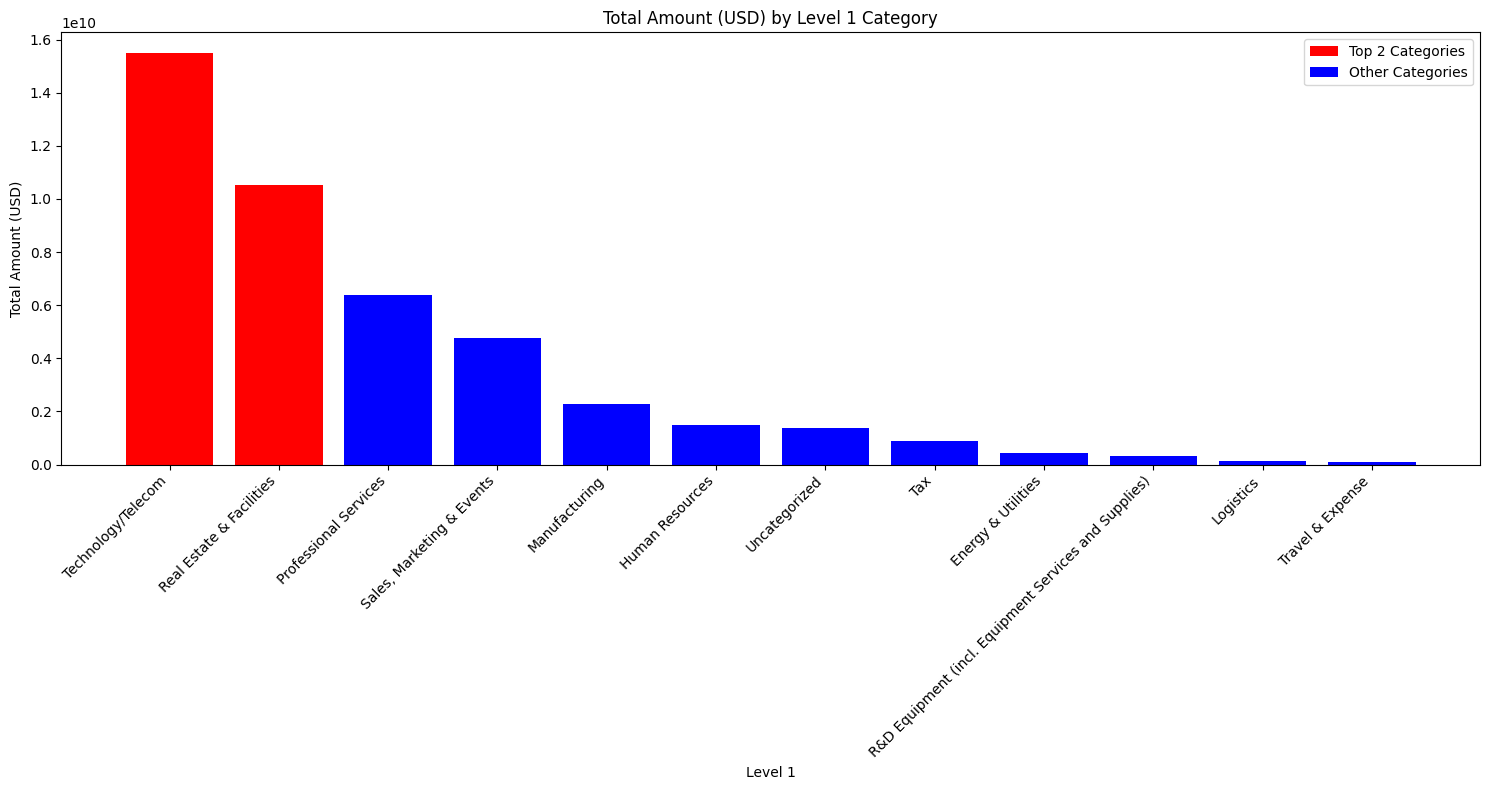

In [ ]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame em ordem decrescente com base na coluna 'Total Amount (USD)'
grouped_df = grouped_df.sort_values(by='Total Amount (USD)', ascending=False)

# Criar uma lista de cores para destacar os dois primeiros valores
colors = ['red' if i < 2 else 'blue' for i in range(len(df))]

# Gerando um gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.bar(grouped_df['Level 1'], grouped_df['Total Amount (USD)'], color=colors)
plt.xlabel('Level 1')
plt.ylabel('Total Amount (USD)')
plt.title('Total Amount (USD) by Level 1 Category')
plt.xticks(rotation=45, ha='right')  # Rotacionar os labels do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de labels

# Adicionando legenda para as barras destacadas
plt.legend([bars[0], bars[2]], ['Top 2 Categories', 'Other Categories'], loc='upper right')

plt.show()

1. As categorias "Technology/Telecom" e "Real Estate & Facilities" são as que possuem os maiores montantes, destacando-se consideravelmente em relação às demais.
2. Apesar das categorias "Logistics" e "Travel & Expense" serem fundamentais, elas apresentam os menores montantes totais.
3. É crucial considerar alocar mais recursos ou reavaliar estratégias para categorias que possuem montantes significativos, pois elas têm grande impacto financeiro.

Recomenda-se uma análise mais aprofundada das categorias líderes para entender os fatores que contribuem para seus altos montantes e identificar possíveis oportunidades ou riscos.

##Verificando a quantidade de dinheiro atrelada a cada categoria no Level 2

In [ ]:
# Agrupar o DataFrame original pela coluna "Level 1" e calcular a soma para cada grupo
level2_df = df.groupby('Level 2')['Amount (USD)'].sum().reset_index()

# Renomear as colunas do novo DataFrame, se desejar
level2_df.columns = ['Level 2', 'Total Amount (USD)']

In [ ]:
level2_df

,Level 2,Total Amount (USD)
0,Accounting and Tax Services,4.726788e+07
1,Airfare,6.304602e+06
2,Audit & Assurance,1.553593e+08
3,Benefits,8.765902e+07
4,Car Rental,1.922069e+06
...,...,...
69,Transportation,6.942169e+07
70,Travel Agency,5.227352e+06
71,Uncategorized,1.377518e+09
72,Warehousing & Distribution,6.256456e+07


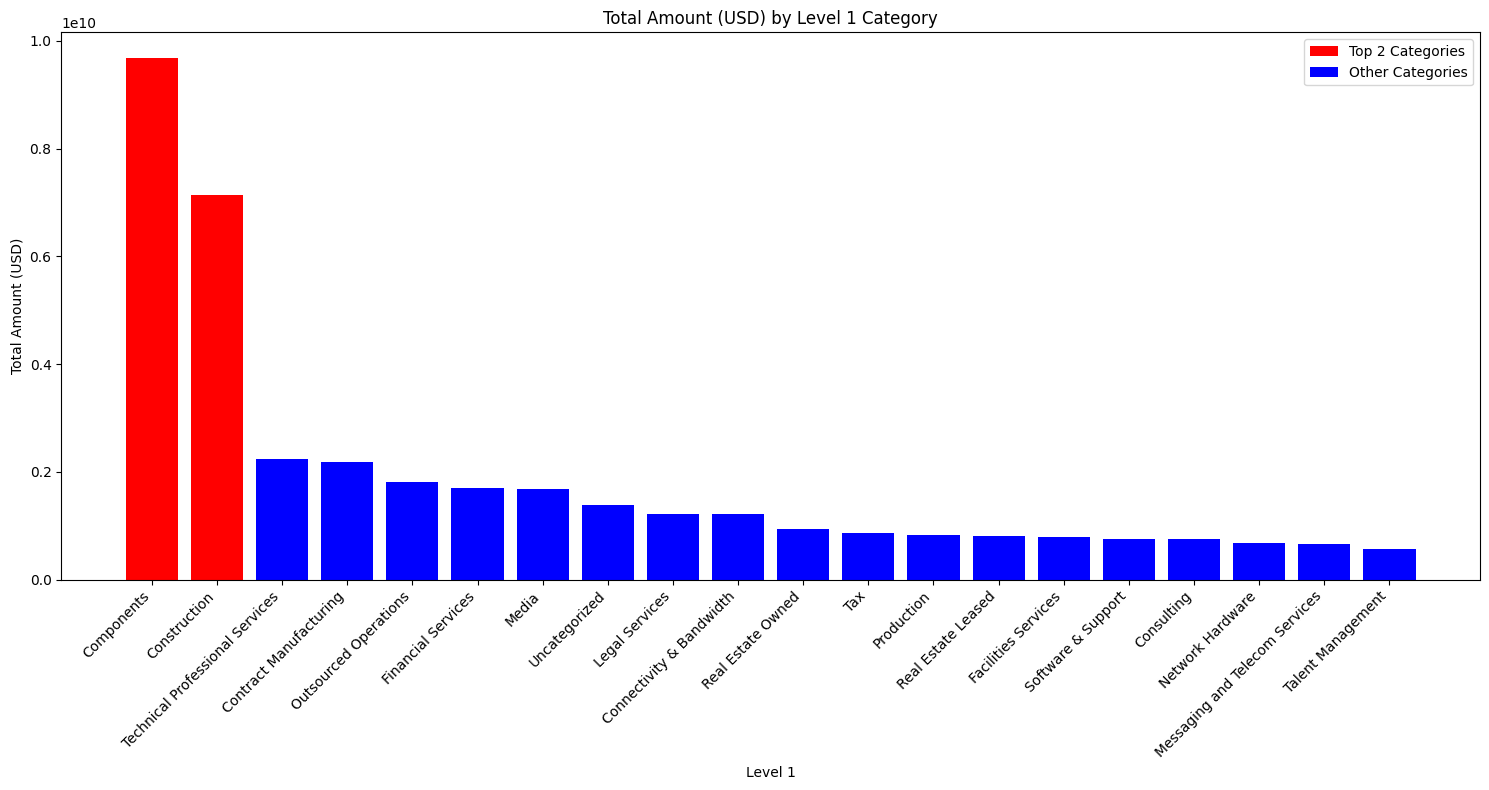

In [ ]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame em ordem decrescente com base na coluna 'Total Amount (USD)'
level2_df = level2_df.sort_values(by='Total Amount (USD)', ascending=False)

top_20_level2 = level2_df.nlargest(20, 'Total Amount (USD)')

# Criar uma lista de cores para destacar os dois primeiros valores
colors = ['red' if i < 2 else 'blue' for i in range(len(df))]

# Gerando um gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.bar(top_20_level2['Level 2'], top_20_level2['Total Amount (USD)'], color=colors)
plt.xlabel('Level 1')
plt.ylabel('Total Amount (USD)')
plt.title('Total Amount (USD) by Level 1 Category')
plt.xticks(rotation=45, ha='right')  # Rotacionar os labels do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de labels

# Adicionando legenda para as barras destacadas
plt.legend([bars[0], bars[2]], ['Top 2 Categories', 'Other Categories'], loc='upper right')

plt.show()

##Verificando a quantidade de dinheiro atrelada a cada categoria no Level 3

In [ ]:
# Agrupar o DataFrame original pela coluna "Level 1" e calcular a soma para cada grupo
level3_df = df.groupby('Level 3')['Amount (USD)'].sum().reset_index()

# Renomear as colunas do novo DataFrame, se desejar
level3_df.columns = ['Level 3', 'Total Amount (USD)']

In [ ]:
level3_df

,Level 3,Total Amount (USD)
0,3PL/Outsourced,4.336977e+07
1,401k & Stock Plan Administration,3.263215e+07
2,Accommodation,8.028796e+06
3,Adtech,3.676670e+07
4,Advisory,4.650883e+08
...,...,...
322,Waste Recycling & eScrap,1.368256e+07
323,Water & Sewage,1.992558e+07
324,Water Sampling / Testing,7.660609e+06
325,Welding Equipment,4.359419e+05


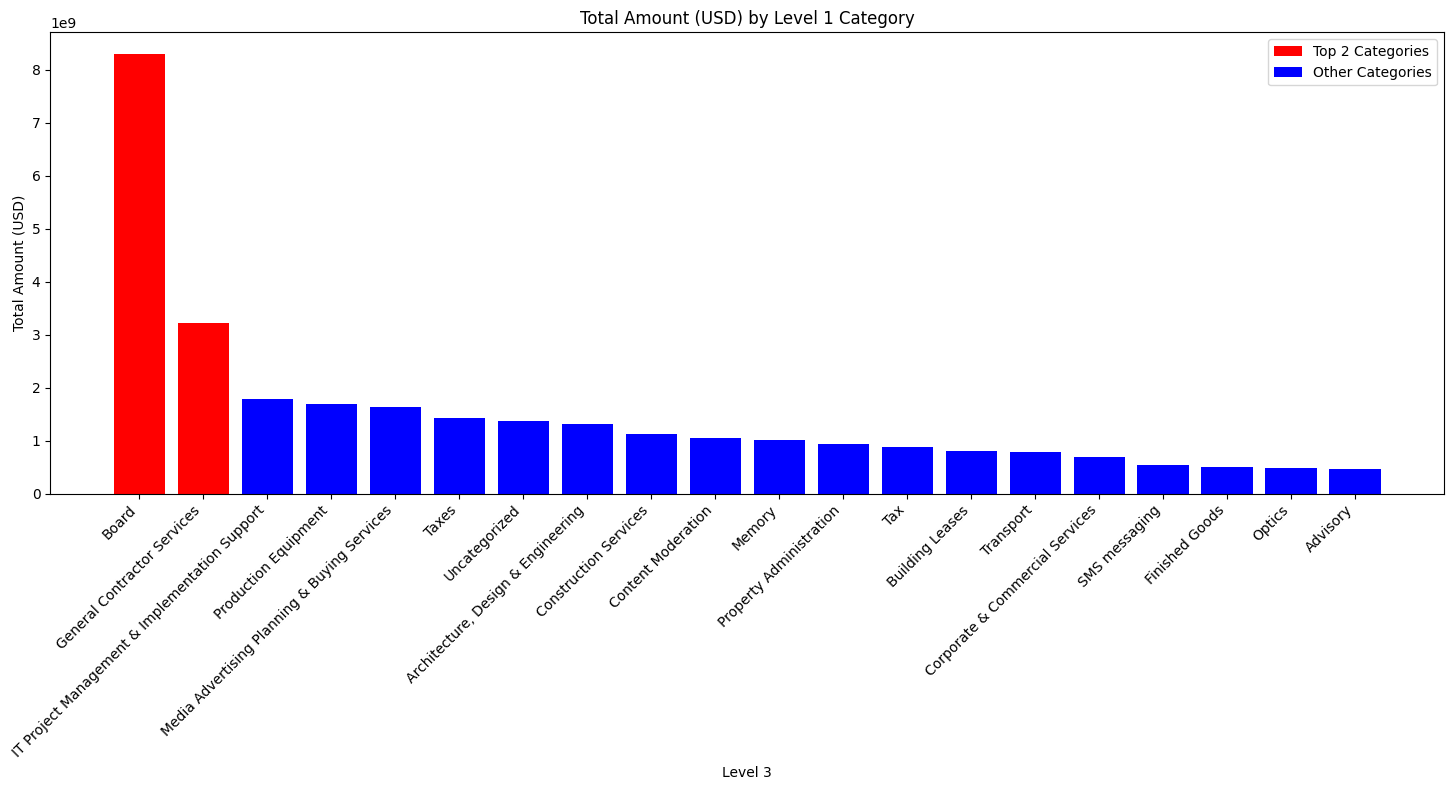

In [ ]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame em ordem decrescente com base na coluna 'Total Amount (USD)'
level3_df = level3_df.sort_values(by='Total Amount (USD)', ascending=False)

top_20_level3 = level3_df.nlargest(20, 'Total Amount (USD)')

# Criar uma lista de cores para destacar os dois primeiros valores
colors = ['red' if i < 2 else 'blue' for i in range(len(df))]

# Gerando um gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.bar(top_20_level3['Level 3'], top_20_level3['Total Amount (USD)'], color=colors)
plt.xlabel('Level 3')
plt.ylabel('Total Amount (USD)')
plt.title('Total Amount (USD) by Level 1 Category')
plt.xticks(rotation=45, ha='right')  # Rotacionar os labels do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de labels

# Adicionando legenda para as barras destacadas
plt.legend([bars[0], bars[2]], ['Top 2 Categories', 'Other Categories'], loc='upper right')

plt.show()

## Região com mais gastos

In [ ]:
# Agrupar os dados pela coluna 'Region', somar os valores em 'Amount (USD)' para cada região e resetar o índice
result = df.groupby('Region')['Amount (USD)'].sum().reset_index()

result

,Region,Amount (USD)
0,APAC,9.184021e+08
1,EMEA,7.173494e+09
2,LATAM,8.445486e+08
3,NORAM,3.523299e+10


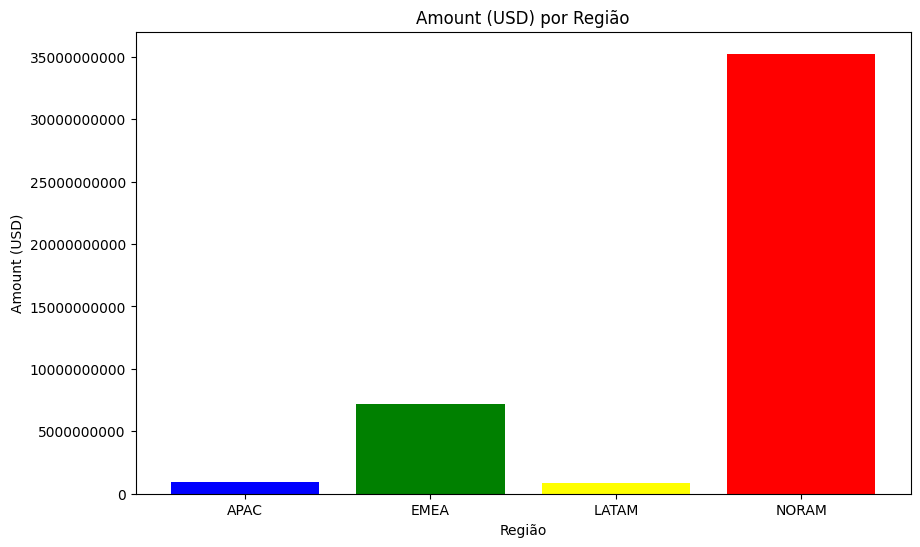

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você já gerou o 'result' anteriormente
# result = df.groupby('Region')['Amount (USD)'].sum().reset_index()

# Usando os valores do DataFrame 'result' para plotar o gráfico
regions = result['Region'].tolist()
amounts = result['Amount (USD)'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(regions, amounts, color=['blue', 'green', 'yellow', 'red'])

# Formatar a escala do eixo y para melhor visualização
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ticklabel_format(axis='y', style='plain')

plt.title('Amount (USD) por Região')
plt.xlabel('Região')
plt.ylabel('Amount (USD)')
plt.show()



1.   Distribuição dos valores: A região NORAM possui um valor muito superior em comparação com as outras regiões, enquanto APAC e LATAM têm valores semelhantes e menores. EMEA fica em segundo lugar em termos de valores, mas ainda assim significativamente menor que NORAM.
2.   Priorização de Mercados: Se esse montante representa vendas ou receitas, a empresa pode considerar NORAM como seu principal mercado, com EMEA sendo o segundo mais importante.
3.   Oportunidades de Crescimento: Dependendo da penetração de mercado ou da presença da empresa nas regiões APAC e LATAM, pode haver uma oportunidade de crescimento nesses mercados, uma vez que seus valores são menores em comparação com NORAM e EMEA.

## Area da empresa com mais gastos

In [ ]:
# Agrupar os dados pela coluna 'Region', somar os valores em 'Amount (USD)' para cada região e resetar o índice
result_area = df.groupby('Cost Center')['Amount (USD)'].sum().reset_index()

result_area

,Cost Center,Amount (USD)
0,0000 - Default Cost Center,2.807927e+09
1,0002 - G&A (Corp),7.863969e+07
2,2001 - GO - XSO - Business Messaging - Support...,2.825528e+06
3,2002 - Do Not Use - Business Messaging - Clien...,2.147144e+06
4,2003 - Marketing & Sales Kustomer,1.490048e+06
...,...,...
1073,6971 - India XFN G&A GEN,3.443866e+05
1074,9910 - Non-Bay Area Facilities & Operations Group,1.899975e+09
1075,9911 - Bay Area Facilities & Operations Group,8.671113e+08
1076,9920 - HR Allocations,5.069429e+08


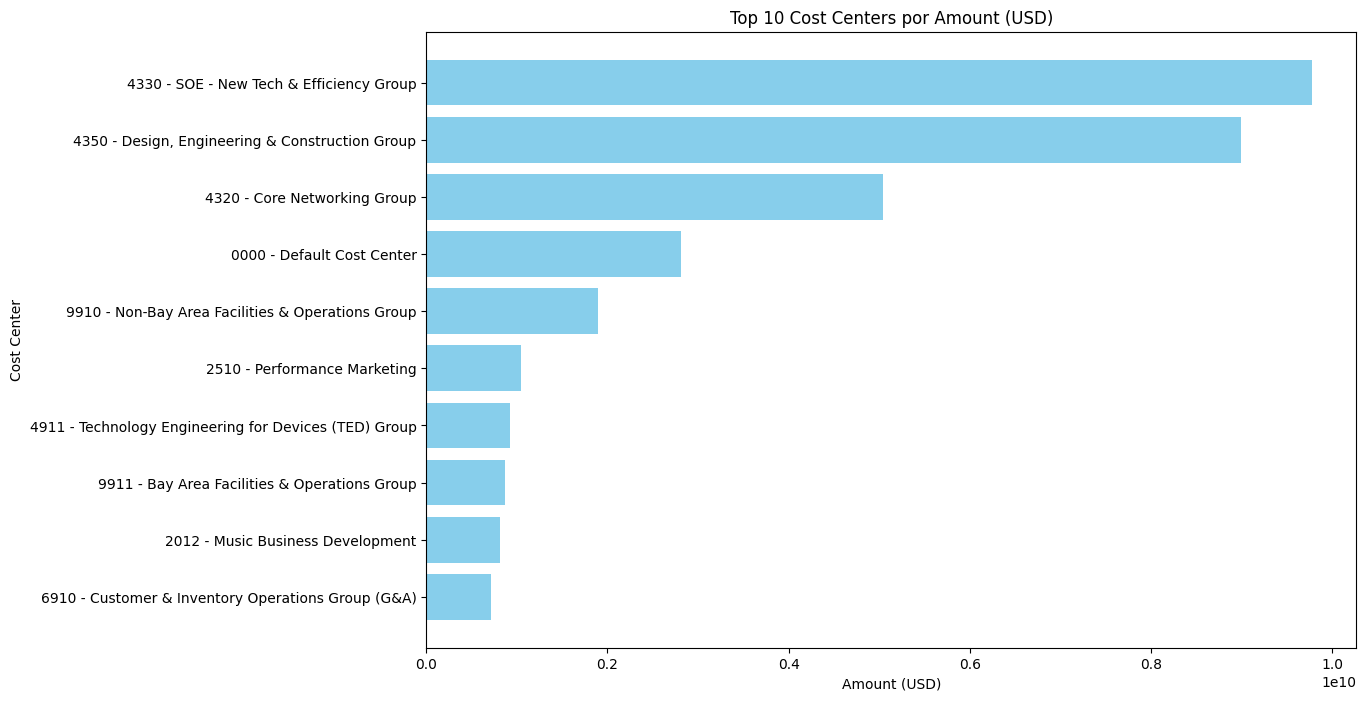

In [ ]:
# Pegando os 10 maiores centros de custo em termos de Amount (USD)
top_10 = result_area.sort_values(by='Amount (USD)', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10['Cost Center'], top_10['Amount (USD)'], color='skyblue')
plt.xlabel('Amount (USD)')
plt.ylabel('Cost Center')
plt.title('Top 10 Cost Centers por Amount (USD)')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior valor esteja no topo
plt.show()